# Análise Preditiva de Cancelamento de Clientes
## Uma Abordagem com Machine Learning e IA Explicável

---

## Introdução

Modelos de negócio baseados em assinatura são amplamente utilizados por empresas de **Telecomunicações** e **Software como Serviço (SaaS)**. Nesse formato, a manutenção da base de clientes é um fator crítico para a sustentabilidade financeira, uma vez que a perda de clientes impacta diretamente a receita recorrente.

O cancelamento de clientes, conhecido como **churn**, normalmente é identificado apenas após o encerramento do vínculo contratual. Esse atraso dificulta a atuação preventiva da empresa. Por esse motivo, técnicas de **Machine Learning** tornam-se fundamentais para identificar, de forma antecipada, clientes com maior propensão ao cancelamento, possibilitando intervenções estratégicas antes da perda efetiva.

Este projeto propõe a construção de um modelo preditivo de churn, aliado a técnicas de **Explainable Artificial Intelligence (XAI)**, permitindo não apenas a previsão do evento, mas também a compreensão dos principais fatores que influenciam o comportamento do cliente.

---

## Aplicações Práticas da Previsão de Churn

A análise preditiva de churn é amplamente utilizada em diferentes contextos organizacionais, tais como:

- Redução da evasão em empresas de **Telecom**
- Proteção da receita recorrente em negócios **SaaS**
- Apoio à tomada de decisão em áreas de **Produto, Marketing e Customer Success**

Essas aplicações demonstram o valor estratégico da modelagem preditiva no apoio à retenção de clientes.

---

## Escopo e Objetivos do Projeto

O desenvolvimento deste notebook contempla as seguintes atividades:

- Investigação inicial dos dados e identificação de padrões relevantes  
- Preparação dos dados e engenharia de atributos  
- Treinamento de modelos de classificação para estimar o risco de churn  
- Avaliação dos modelos com métricas orientadas ao impacto no negócio  
- Análise interpretativa dos modelos por meio de técnicas de explicabilidade, como **SHAP**

---

## Descrição do Conjunto de Dados

O dataset utilizado contém informações de clientes de uma empresa do setor de Telecomunicações. Cada observação representa um cliente e reúne dados relacionados ao seu perfil, características contratuais, utilização de serviços e histórico financeiro.

A tarefa de modelagem consiste em classificar os clientes entre aqueles que tendem a permanecer ativos e aqueles com maior probabilidade de cancelamento.

---

## Variável Alvo

A variável de interesse do estudo é denominada **Churn**, responsável por indicar o status do cliente em relação ao cancelamento do serviço.

| Categoria | Código | Significado |
|----------|--------|-------------|
| Yes      | 1      | Cliente cancelou o serviço |
| No       | 0      | Cliente permaneceu ativo |

---

## Estrutura das Informações

As variáveis disponíveis no conjunto de dados podem ser organizadas nos seguintes grupos:

| Dimensão | Conteúdo |
|--------|----------|
| Características do Cliente | Gênero, idade, estado civil e dependentes |
| Aspectos Contratuais | Duração do contrato (*tenure*), tipo de plano e forma de pagamento |
| Serviços Contratados | Telefonia, internet, streaming e serviços adicionais |
| Dados Financeiros | Valor mensal e montante total faturado |
| Target | Indicador de churn |


## **2.Entendimento dos dados**

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/cristiano-deepdb/Churn_Customers/main/data/raw/telecom_churn.csv"

df = pd.read_csv(url)

print("Dataset baixado e carregado com sucesso!")


Dataset baixado e carregado com sucesso!


In [25]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [27]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [28]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


## Variável Alvo

A variável **Churn** apresenta forte desbalanceamento entre as classes. Aproximadamente **85,5%** dos clientes pertencem à classe **0 (não churn)**, enquanto apenas **14,5%** correspondem à classe **1 (churn)**.

Esse cenário pode induzir modelos de Machine Learning a favorecer a classe majoritária. Portanto, será necessário empregar técnicas para tratar o desbalanceamento, como ajuste de pesos, reamostragem dos dados e utilização de métricas mais apropriadas, como **Recall**, **F1-Score** e **AUC-ROC**.


In [ ]:
import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="bar", color='red')
plt.title("Distribuição Churn vs NaoChurn")
plt.xlabel("Churn")
plt.ylabel("Quantidade de clientes")
plt.show()

Churn
0    2850
1     483
Name: count, dtype: int64

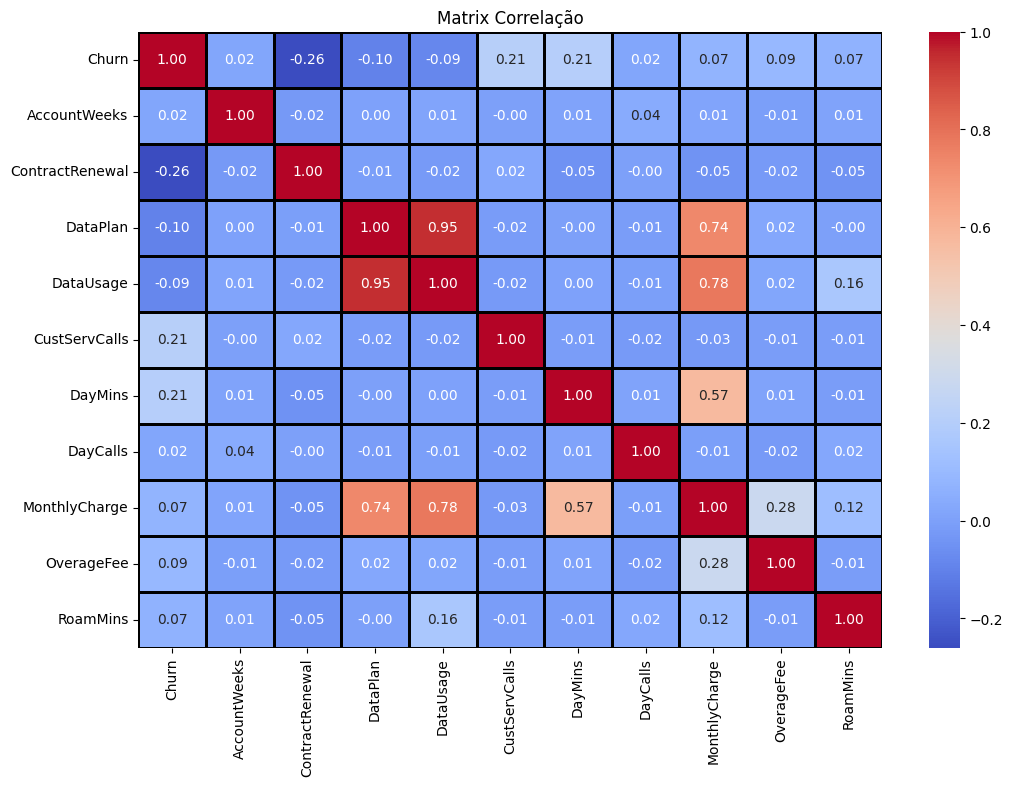

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="YlGn",
    linewidths=1,
    linecolor="black"
)
plt.title("Matriz de Correlação")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

# Boxplot 1: Tempo de contrato vs Churn
plt.subplot(1, 3, 1)
sns.boxplot(x="Churn", y="AccountWeeks", data=df, color='red')
plt.title("Tempo de Permanência do Cliente por Status de Churn")
plt.xlabel("Status de Churn")
plt.ylabel("Semanas de Contrato")

# Boxplot 2: Valor mensal vs Churn
plt.subplot(1, 3, 2)
sns.boxplot(x="Churn", y="MonthlyCharge", data=df, color='red')
plt.title("Cobrança Mensal por Status de Churn")
plt.xlabel("Status de Churn")
plt.ylabel("Valor Mensal")

# Boxplot 3: Chamadas ao atendimento vs Churn
plt.subplot(1, 3, 3)
sns.boxplot(x="Churn", y="CustServCalls", data=df, color='red')
plt.title("Chamadas ao Atendimento por Status de Churn")
plt.xlabel("Status de Churn")
plt.ylabel("Número de Chamadas")

plt.tight_layout()
plt.show()


## 3. Preparação dos Dados

### Construção de Variáveis Derivadas

Além das variáveis originais, foram elaboradas **features adicionais** com o objetivo de representar padrões de **uso do serviço**, **impacto financeiro** e **interações com o suporte**, fatores frequentemente associados ao cancelamento de clientes em empresas de Telecom.

A variável **`cost_pressure_index`** relaciona o valor de cobranças adicionais com a cobrança mensal do cliente, funcionando como um indicador de **pressão financeira** causada por excedentes de uso.

A feature **`usage_intensity`** representa a média de minutos utilizados por chamada durante o dia, permitindo diferenciar clientes com **uso concentrado** daqueles com chamadas mais curtas e frequentes.

Já a variável **`support_frequency`** mede a taxa de chamadas ao atendimento em relação ao tempo de contrato, capturando possíveis **problemas recorrentes ao longo da permanência do cliente**.

Por fim, a feature **`roaming_dependency`** quantifica a relevância do uso em roaming no perfil do cliente, o que pode estar associado a custos adicionais e maior propensão ao churn.


In [ ]:
df = df.copy()

# Evita divisões por zero
epsilon = 1e-6

# Índice de pressão financeira por excedente
df['cost_pressure_index'] = df['OverageFee'] / (df['MonthlyCharge'] + epsilon)

# Intensidade média de uso por chamada
df['usage_intensity'] = df['DayMins'] / (df['DayCalls'] + 1)

# Frequência de contato com o suporte ao longo do contrato
df['support_frequency'] = df['CustServCalls'] / (df['AccountWeeks'] + 1)

# Dependência de roaming em relação ao uso diário
df['roaming_dependency'] = df['RoamMins'] / (df['DayMins'] + epsilon)


In [ ]:
df = df[[col for col in df.columns if col != 'Churn'] + ['Churn']]
df.head()

In [ ]:
# Dataset para treinamento do modelo
# df.to_parquet('../data/trusted/ChurnDataset.parquet')